<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Self_training_with_Noisy_Student_improves_ImageNet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Self-training with Noisy Student improves ImageNet classification**

논문 링크: https://arxiv.org/abs/1911.04252

본 논문은 2020년에 SOTA 성능을 달성한 **Noisy Student**에 관한 논문이다. Noisy Student란, **SOTA model에 unlabeled image를 활용하여 성능을 향상시키는 학습 방법**이다.

## **Noisy Student**

본 논문은 제목에 나와있듯이 ImageNet에 적용을 시켰는데, ImageNet trainin set에 포함되지 않는 image들을 unlabeld image로 사용한다.(ImageNet 카테고리에 포함되지 않는다.) 그 다음에 Noisy Student training으로 학습을 진행한다.

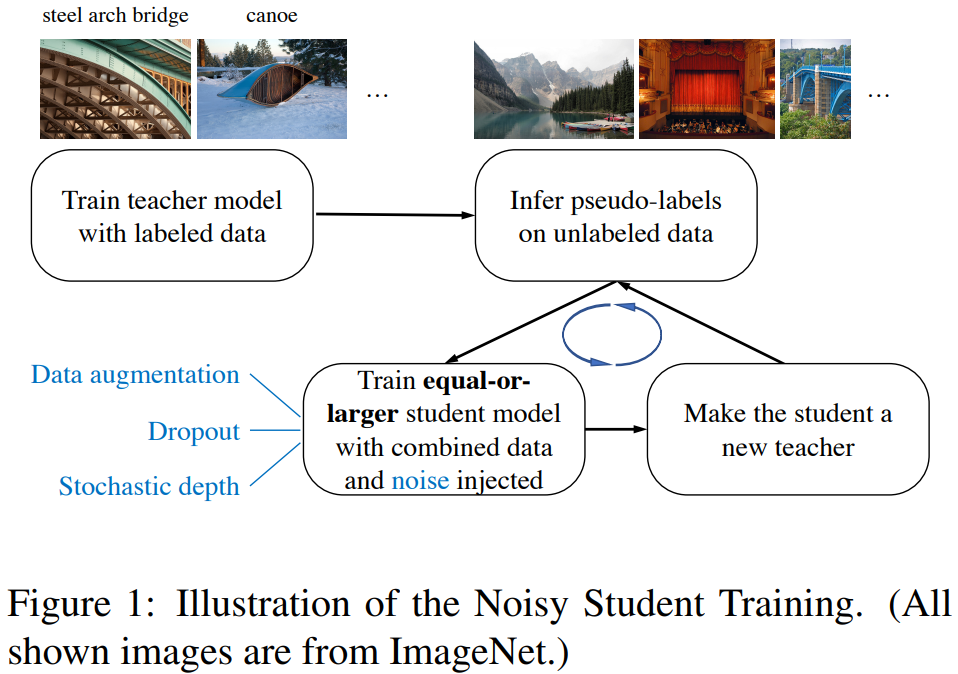

전반적인 학습 알고리즘은 위와 같다. 먼저 **(1)labeled image로 teacher model을 학습**시킨다. 그 다음 **(2)teacher model을 사용하여 unlabeled image의 pseudo label을 생성**하고, **(3)labeled image와 pseudo labeled image를 결합하여 student model을 학습**한다. 그리고 **(4)이제 학습된 studnet model을 teacher model로써 사용하여 pseudo label을 생성 후 또 다른 student을 (1)~(3) 방식으로 다시 학습**을 한다.

이러한 과정을 반복하는 것이 바로 **Noisy Student Training**기법이다. (참고로 student를 학습할 때 dropout, stochastic depth, data augmentation과 같은 noise들을 추가한다.)

조금 더 구체적으로 수식과 함께 설명을 해보겠다.

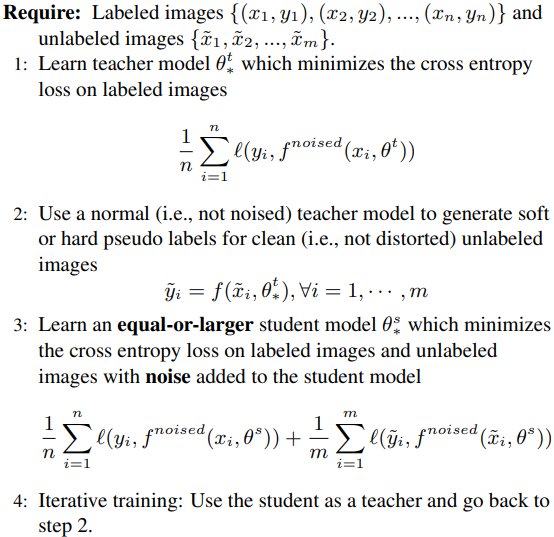

먼저, labeled image와 unlabeled image를 준비한다.

그리고 labeled image로 teacher model을 학습할 때, teacher model로는 EfficientNet을 사용하고 loss function은 cross entropy loss를 사용하여 최소화한다. 위의 글에서 1. 부분의 수식을 보면 noise를 추가하여 학습을 진행하는 것을 알 수 있다.

그 다음으로 2. 부분과 같이 teacher model로 unlabeled image에 대한 pseudo label을 생성하는데, 이때는 noise를 추가하지 않는다.

이번엔 pseudo labeled image와 labeled image로 npise가 추가된 student model을 학습한다. 이때, **student model은 teacher model보다 같거나 큰 model을 사용**한다. loss function은 3. 부분의 수식과 같다.

그리고 앞서 언급했듯이 위 과정을 반복한다.

## **Experiments**

과연 Noisy Student Training 기법으로 성능이 얼마나 좋아졌을까? 논문의 실험들을 통해 알아보겠다.

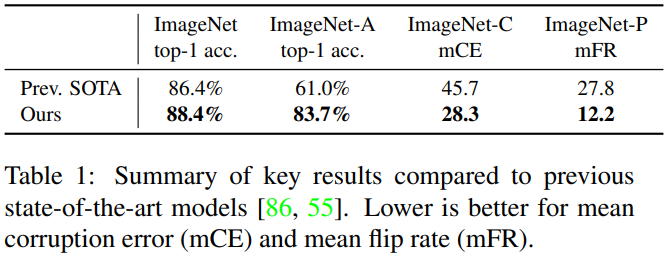

Noisy Student Training은 self-training과 distilation을 향상시킨다. 즉, Noisy Student Training은 결과적으로 noise와 pseudo labeled image를 추가했기 때문에 **student가 teacher보다 적어도 동일하거나 더 좋은 성능을 얻는다**. 또한, 단순 정확도뿐만 아니라 **robustness도 향상**시킨다. 위의 표 Table 1을 보면 알 수 있다. 

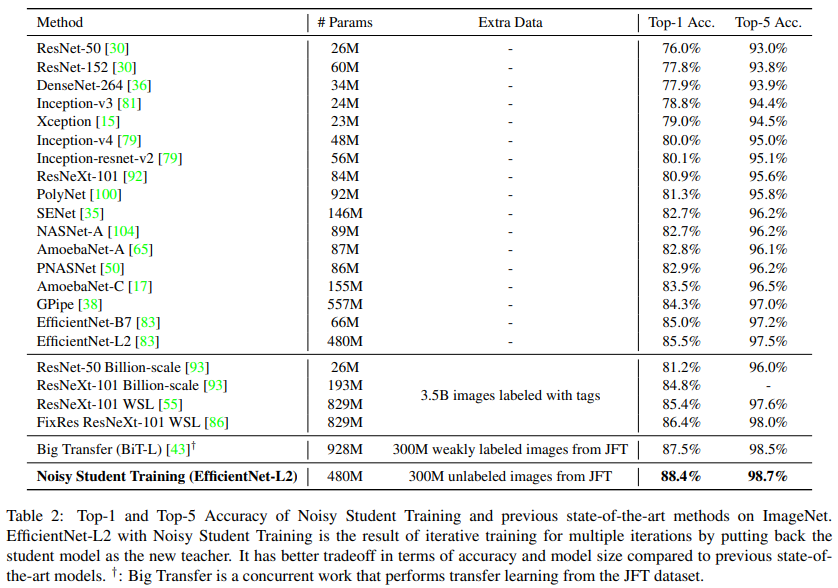

학습에 사용하는 labeled image dataset은 ImageNet 2012 dataset을 사용했고, unlabeled image는 JFT dataset을 사용했다. best model은 Noisy Student training을 3번 반복했고, 초기 teacher는 EfficientNet-B7, student는 EfficientNet-L2를 사용했다.

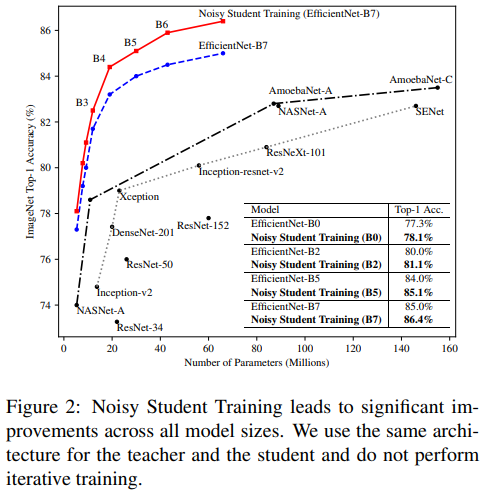

위의 그림 Figure 2는 EfficientNet이 아닌 다른 작은 model에 noisy student training을 적용한 결과이다.

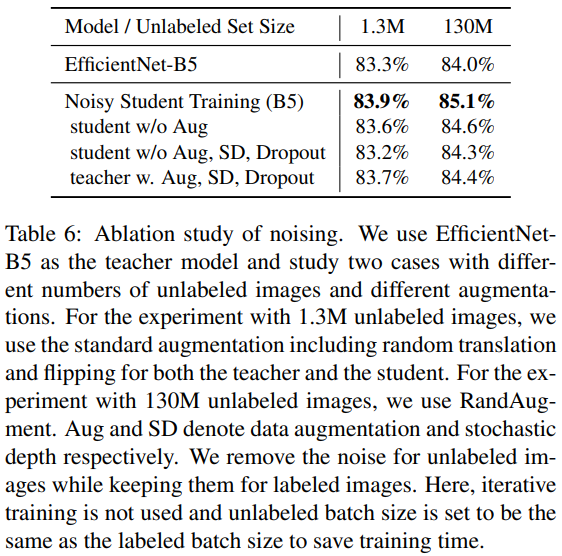

위의 표 Table 6을 보면 noise의 적용 유/무에 따른 성능을 알 수 있다. noise의 종류는 두 가지인데, 첫 번째는 RandAugment를 사용한 data augmentation과 두 번째로는 dropout, stochastic depth 기법이다.

추가적으로 본 논문에서는 **data filtering**과 **balancing** 기법을 사용했는데, **data filtering은 teacher model에서 낮은 confidence를 가진 image를 걸러주는 것**이며, **balancing은 training set과 unlabeled image의 분포를 균일하게 하기 위해서 각 class에 대한 unlabeled image의 수로를 균등하게 하는 것**이다. image가 부족한 class는 image를 복사해 늘려주고, 너무 많은 class는 confidence가 높은 image를 제거한다.

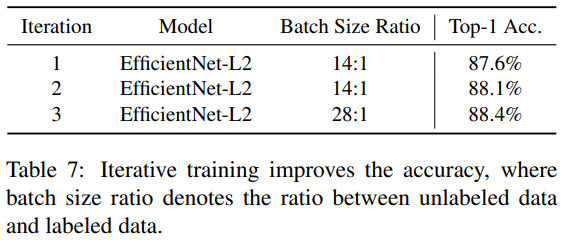

이전 논문들과의 차이점은 **student model에 noise를 추가한 것**과 **student model을 teacher model보다 크거나 같은 model을 사용한 것**이다. 이렇게 함으로써 이러한 과정을 반복시 위의 표 Table 7과 같이 student model이 teacher model보다 어려운 환경에서 학습이 이루어져 더 좋은 성능을 갖게 되는 것이다.